In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

In [3]:
def quad(x,a,b,c):
  return a * x**2 + b * x + c

def inv_quad_p(y,a,b,c):
  return - b/(2*a) + np.sqrt(b**2 - 4*a*(c-y))/(2*a)

def inv_quad_n(y,a,b,c):
  return - b/(2*a) - np.sqrt(b**2 - 4*a*(c-y))/(2*a)

In [4]:
def kohl(x,lm,k,c):
  return lm * x + k * x ** 3/2 + c

def cube(x,a,b,c,d):
  return a * x ** 3 + b * x ** 2 + c * x + d

def quart(x,a,b,c,d,e):
  return a * x ** 4 + b * x ** 3 + c * x ** 2 + d * x + e

In [5]:
def exp_fit(x,a,b,k):
    return a * np.exp(- k * x) + b

In [6]:
def onsager_alpha(l_0,D,T,eta):
    return 8.2E5 * l_0 * (D * T) ** -1.5 + 82 * (D * T) ** -0.5 / eta

In [7]:
def fuoss_kraus(x,y,l_0,D,T,eta):
    return y * ( l_0 - onsager_alpha(l_0,D,T,eta) * np.sqrt(x * y) )

In [8]:
def d_h_o(x,alpha,lambda_0,a,b):
    return alpha * lambda_0 - alpha ** 1.5 * ( a + b * lambda_0 ) * x ** 0.5

In [9]:
ki_x = [0.001,0.0025,0.005,0.01,0.02,0.03,0.04,0.05]
ki_c_20 = [144.1,330.8,594.2,1093,1870,2529,3143,3652]

In [10]:
ki_x_30 = [0,100*0.036/166.0028,100*0.03/166.0028,0.04,0.05]
ki_c_30 = [35.75,2340,1927,4202,5518]

In [11]:
ki_x_50 = [0,.01,.02,.03,.04]
ki_c_50 = [141.9,1320,2366,3490,4508]

In [12]:
# 50 deg after cal wb 12/06:
ki_x2_50 = [0,0.00148,0.00184,0.00246,0.00369,0.005,0.0067,0.01,0.019,0.0203,0.029]
ki_c2_50 = [158.2,401,451,529,673,870,1058,1387,2220,2318,3021]

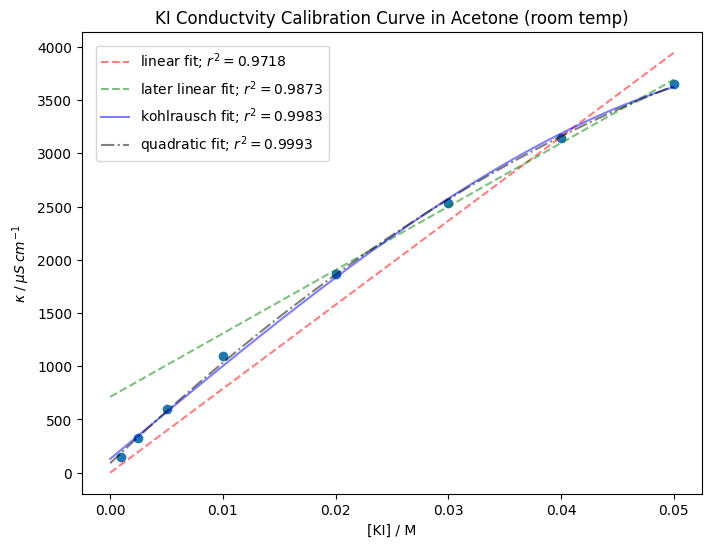

In [13]:
# KI Calibration - room temp

x=np.array(ki_x)
y=np.array(ki_c_20)

plt.figure(figsize=(8,6))

plt.scatter(x,y)

xs = np.linspace(0,0.05,100)

# straight line fit for whole fit
lin_reg = LinearRegression(fit_intercept=False)
lin_reg.fit(x.reshape(-1,1),y.reshape(-1,1))
m_i = lin_reg.coef_[0]
s = lin_reg.score(x.reshape(-1,1),y.reshape(-1,1))
plt.plot(xs,(m_i*xs),'r--',alpha=0.5, label=f'linear fit; $r^2 = {s:.4f}$')

# straight line fit for higher conc
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(x[4:].reshape(-1,1),y[4:].reshape(-1,1))
m2_i = lin_reg.coef_[0]
c2_i = lin_reg.intercept_
s2 = lin_reg.score(x[3:].reshape(-1,1),y[3:].reshape(-1,1))
plt.plot(xs,(m2_i*xs + c2_i),'g--',alpha=0.5, label=f'later linear fit; $r^2 = {s2:.4f}$')


# Kohlrausch fit
popk_i, pcov = curve_fit( kohl, x , y )
residuals2 = y - kohl(x, *popk_i)
ss_res2 = np.sum(residuals2**2)
ss_tot2 = np.sum((y-np.mean(y))**2)
s4 = 1 - (ss_res2 / ss_tot2)
plt.plot(xs,kohl(xs,*popk_i), 'b-', alpha = 0.5, label=f'kohlrausch fit; $r^2 = {s4:.4f}$')


## quadratic fit
popt_i, pcov = curve_fit( quad, x , y )

# r^2
residuals = y - quad(x, *popt_i)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
s3 = 1 - (ss_res / ss_tot)
plt.plot(xs,quad(xs,*popt_i), 'k-.', alpha = 0.5, label=f'quadratic fit; $r^2 = {s3:.4f}$')

## cubic fit
popc_i, pcov = curve_fit( cube, x , y )

# r^2
residuals = y - cube(x, *popc_i)
ss_resc = np.sum(residuals**2)
ss_totc = np.sum((y-np.mean(y))**2)
s3c = 1 - (ss_resc / ss_totc)
#plt.plot(xs,cube(xs,*popc_i), 'y-', alpha = 1, label=f'cubic fit; $r^2 = {s3c:.4f}$')

plt.title('KI Conductvity Calibration Curve in Acetone (room temp)')
plt.xlabel('[KI] / M')
plt.ylabel('$\kappa \hspace{.3} / \hspace{.3} \mu S \hspace{.2} cm^{-1}$')
plt.legend(borderaxespad=1)
plt.show()

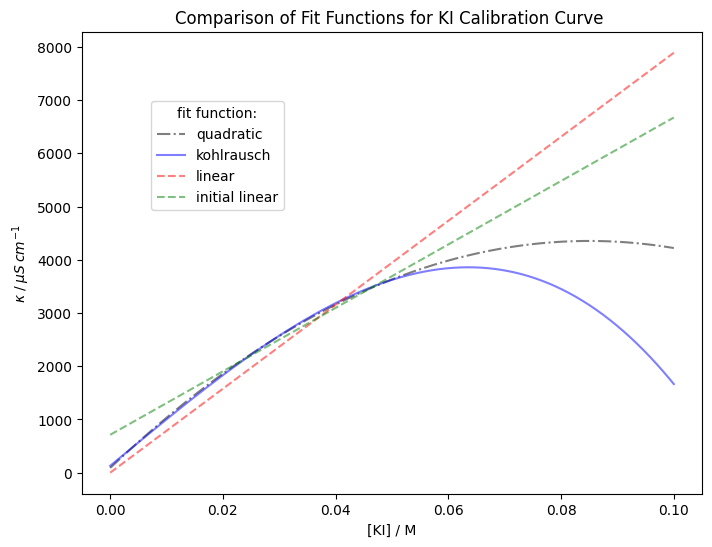

In [14]:
X = np.linspace(0,0.1,1000)

plt.figure(figsize=(8,6))

plt.plot(X,quad(X,*popt_i),'k-.',alpha=0.5, label='quadratic')
plt.plot(X,kohl(X,*popk_i),'b-',alpha=0.5, label='kohlrausch')
plt.plot(X,m_i*X,'r--',alpha=0.5, label='linear')
plt.plot(X,m2_i*X+c2_i,'g--',alpha=0.5, label='initial linear')

plt.title('Comparison of Fit Functions for KI Calibration Curve ')
plt.xlabel('[KI] / M')
plt.ylabel('$\kappa \hspace{.3} / \hspace{.3} \mu S \hspace{.2} cm^{-1}$')
plt.legend(title='fit function:',borderaxespad=5)
plt.show()

/var/folders/3n/95jg4lk951v3w70mx0z383s00000gn/T/ipykernel_4798/1984184764.py:2: RuntimeWarning: invalid value encountered in sqrt
  return y * ( l_0 - onsager_alpha(l_0,D,T,eta) * np.sqrt(x * y) )


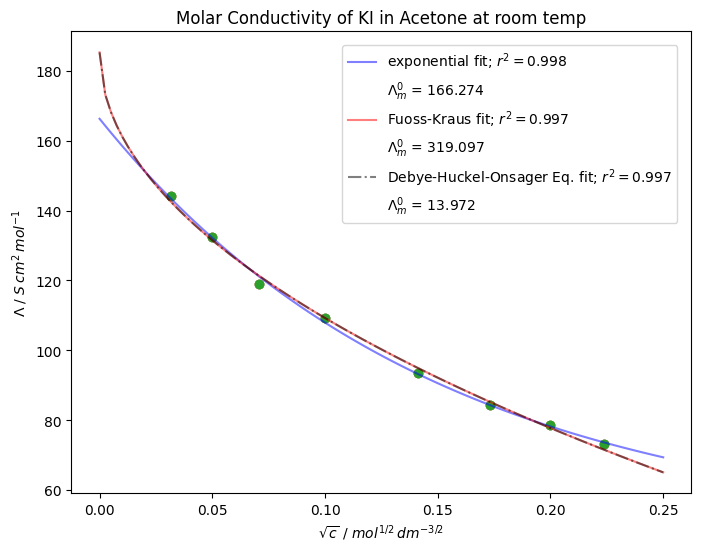

In [15]:
# Molar Conductivity - rt

x = np.array(ki_x)
y = np.array(ki_c_20)

y = 10**-3 * y/x
x = np.sqrt(x)

xs = np.linspace(0,0.25,100)

plt.figure(figsize=(8,6))

# straight line fit for whole fit
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(x.reshape(-1,1),y.reshape(-1,1))
m = lin_reg.coef_[0]
c = lin_reg.intercept_
s = lin_reg.score(x.reshape(-1,1),y.reshape(-1,1))
#plt.plot(xs,(m*xs + c),'g-',alpha=0.5, label=f'linear fit; $r^2 = {s:.4f}$')

# exponential fit
popt, pcov = curve_fit( exp_fit , x , y , p0=[500000,100000,10] )
residuals = y - exp_fit(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
s = 1 - (ss_res / ss_tot)

plt.scatter(x,y)
plt.plot(xs,exp_fit(xs,*popt), 'b-', alpha = 0.5, label=f'exponential fit; $r^2 = {s:.3f}$')
plt.plot([], [], ' ', label=f'$\Lambda_m^0$ = {popt[0]+popt[1]:.3f}')

# Fuoss-Kraus fit - https://pubs.acs.org/doi/pdf/10.1021/ja01172a507
D = 20.7
T = 298
eta = 0.306
popt2, pcov = curve_fit( lambda x, gamma, l_0: fuoss_kraus(x,gamma,l_0,D,T,eta), x , y , p0=[0.5,0.2] )
residuals = y - fuoss_kraus(x, *popt2, D, T, eta)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
s2 = 1 - (ss_res / ss_tot)

plt.scatter(x,y)
plt.plot(xs,fuoss_kraus(xs,*popt2, D, T, eta), 'r-', alpha = .5, label=f'Fuoss-Kraus fit; $r^2 = {s2:.3f}$')
plt.plot([], [], ' ', label=f'$\Lambda_m^0$ = {popt2[1]:.3f}')


# Debye-Huckel_Onsager fit - conductivity of electrolytes textbook
popt3, pcov = curve_fit( d_h_o, x , y , p0=[0.5,0.2,1,1], bounds=((0, 0, -np.inf, -np.inf), (np.inf, np.inf, np.inf, np.inf)) )
residuals = y - d_h_o(x, *popt3)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
s3 = 1 - (ss_res / ss_tot)

plt.scatter(x,y)
plt.plot(xs,d_h_o(xs,*popt3), 'k-.', alpha = 0.5, label=f'Debye-Huckel-Onsager Eq. fit; $r^2 = {s3:.3f}$')
plt.plot([], [], ' ', label=f'$\Lambda_m^0$ = {popt3[1]:.3f}')

plt.title('Molar Conductivity of KI in Acetone at room temp')
plt.xlabel('$\sqrt{c}$ / $mol^{1/2} \hspace{.2} dm^{-3/2}$')
plt.ylabel('$\Lambda$ / $S \hspace{.2} cm^2 \hspace{.2} mol^{-1}$')
plt.legend(borderaxespad=1)
plt.show()

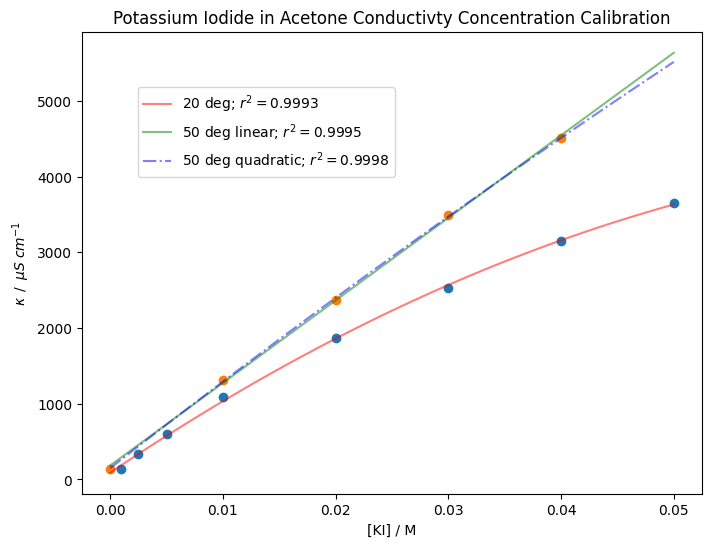

In [16]:
# KI Calibration - 50 deg #1

### Room Temp
plt.figure(figsize=(8,6))
x=np.array(ki_x)
y=np.array(ki_c_20)
plt.scatter(x,y)

xs = np.linspace(0,0.05,100)

## quadratic fit
popt_i, pcov = curve_fit( quad, x , y )

# r^2
residuals = y - quad(x, *popt_i)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
s3 = 1 - (ss_res / ss_tot)
plt.plot(xs,quad(xs,*popt_i), 'r-', alpha = 0.5, label=f'20 deg; $r^2 = {s3:.4f}$')

##############
### 50 deg ###

x2=np.array(ki_x_50)
y2=np.array(ki_c_50)
plt.scatter(x2,y2)

# straight line fit
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(x2.reshape(-1,1),y2.reshape(-1,1))
m50_i = lin_reg.coef_[0][0]
c50_i = lin_reg.intercept_[0]
s50 = lin_reg.score(x2.reshape(-1,1),y2.reshape(-1,1))
plt.plot(xs,(m50_i*xs + c50_i),'g-',alpha=0.5, label=f'50 deg linear; $r^2 = {s50:.4f}$')

## quadratic fit
popt50_i, pcov2 = curve_fit( quad, x2 , y2 )

# r^2
residuals = y2 - quad(x2, *popt50_i)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y2-np.mean(y2))**2)
s50_q = 1 - (ss_res / ss_tot)
plt.plot(xs,quad(xs,*popt50_i), 'b-.', alpha = 0.5, label=f'50 deg quadratic; $r^2 = {s50_q:.4f}$')


plt.title('Potassium Iodide in Acetone Conductivty Concentration Calibration')
plt.xlabel('[KI] / M')
plt.ylabel('$ \kappa \hspace{.5} / \hspace{.5}  \mu S \hspace{.3} cm^{-1}$')

plt.legend(loc = 2,borderaxespad=4)
plt.show()

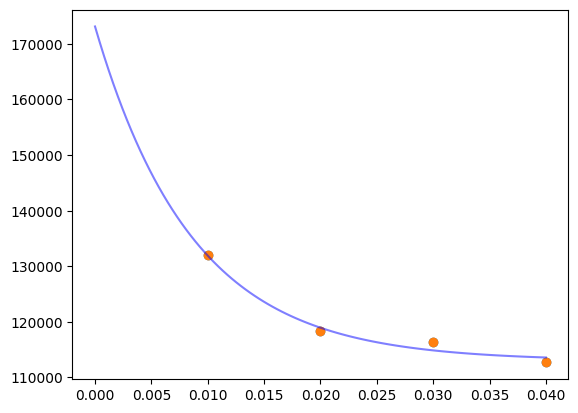

In [17]:
# Molar Conductivity - 50 degrees OLD CAL

x=np.array(ki_x_50)
y=np.array(ki_c_50)

x = x[1:]
y=y[1:]/x
#x = np.sqrt(x)

plt.scatter(x,y)

xs = np.linspace(0,0.04,100)

# exponential fit
popt, pcov = curve_fit( exp_fit , x , y , p0=[500000,100000,10] )
residuals = y - exp_fit(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
s = 1 - (ss_res / ss_tot)

plt.scatter(x,y)
plt.plot(xs,exp_fit(xs,*popt), 'b-', alpha = 0.5, label=f'exponential fit; $r^2 = {s:.3f}$')
plt.plot([], [], ' ', label=f'$\Lambda_m^0$ = {popt[0]+popt[1]:.3f}')

plt.show()

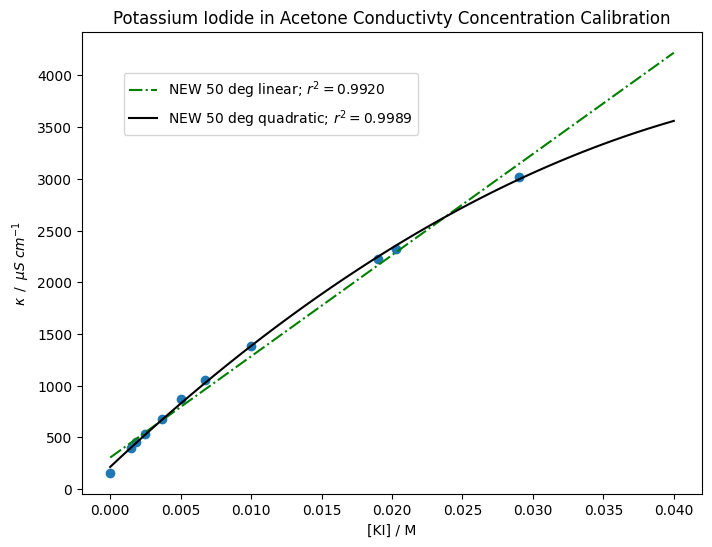

In [18]:
# KI Calibration

### Room Temp
plt.figure(figsize=(8,6))

xs = np.linspace(0,0.04,100)

# 50 deg - recalibrated

x_new = np.array(ki_x2_50)
y_new = np.array(ki_c2_50)

plt.scatter(x_new,y_new)

# straight line fit
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(x_new.reshape(-1,1),y_new.reshape(-1,1))
m50n_i = lin_reg.coef_[0][0]
c50n_i = lin_reg.intercept_[0]
s50n = lin_reg.score(x_new.reshape(-1,1),y_new.reshape(-1,1))
plt.plot(xs,(m50n_i*xs + c50n_i),'g-.',alpha=1, label=f'NEW 50 deg linear; $r^2 = {s50n:.4f}$')

## quadratic fit
popt50n_i, pcov2 = curve_fit( quad, x_new , y_new )

# r^2
residuals = y_new - quad(x_new, *popt50n_i)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_new - np.mean(y_new))**2)
s50n_q = 1 - (ss_res / ss_tot)
plt.plot(xs,quad(xs,*popt50n_i), 'k-', alpha = 1, label=f'NEW 50 deg quadratic; $r^2 = {s50n_q:.4f}$')

plt.title('Potassium Iodide in Acetone Conductivty Concentration Calibration')
plt.xlabel('[KI] / M')
plt.ylabel('$ \kappa \hspace{.5} / \hspace{.5}  \mu S \hspace{.3} cm^{-1}$')

plt.legend(loc = 2,borderaxespad=3)
plt.show()

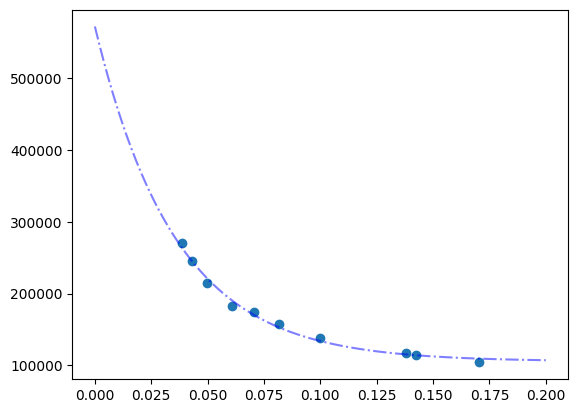

In [19]:
# Molar Conductivity - 50 degrees NEW CAL

x = np.array(ki_x2_50)
y = np.array(ki_c2_50)

x = x[1:]
y=y[1:]/x
x = np.sqrt(x)

plt.scatter(x,y)

xs = np.linspace(0,0.2,100)

# exponential fit
popt, pcov = curve_fit( exp_fit , x , y , p0=[500000,100000,10] )
residuals = y - exp_fit(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
s = 1 - (ss_res / ss_tot)
plt.plot(xs,exp_fit(xs,*popt), 'b-.', alpha = 0.5, label=f'exp fit; $r^2 = {s4:.4f}$')

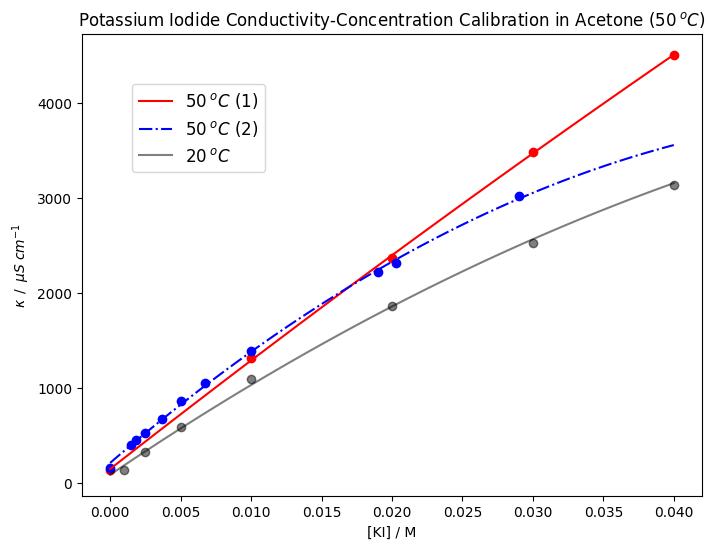

In [20]:
# KI Calibration 50 degree new NEAT

plt.figure(figsize=(8,6))

xs = np.linspace(0,0.04,100)


### 50 deg OLD

plt.scatter(ki_x_50,ki_c_50,c='r')
#plt.plot(xs,(m50_i*xs + c50_i),'g-',alpha=0.5, label=f'linear fit; $r^2 = {s50n:.4f}$')
plt.plot(xs,quad(xs,*popt50_i), 'r-', alpha = 1, label='$50 \hspace{.2} ^oC$ (1)')

### 50 deg NEW

plt.scatter(ki_x2_50,ki_c2_50,c='b')
#plt.plot(xs,(m50n_i*xs + c50n_i),'g-',alpha=0.5, label=f'linear fit; $r^2 = {s50n:.4f}$')
plt.plot(xs,quad(xs,*popt50n_i), 'b-.', alpha = 1, label='$50 \hspace{.2} ^oC$ (2)')

### Room Temp

plt.scatter(ki_x[:7],ki_c_20[:7],c='k',alpha=0.5)
plt.plot(xs,quad(xs,*popt_i), 'k-', alpha = 0.5, label='$20 \hspace{.2} ^oC$')

plt.title('Potassium Iodide Conductivity-Concentration Calibration in Acetone ($50 \hspace{.2} ^oC$)')
plt.xlabel('[KI] / M')
plt.ylabel('$ \kappa \hspace{.5} / \hspace{.5}  \mu S \hspace{.3} cm^{-1}$')

plt.legend(loc = 2, borderaxespad=3, fontsize=12)
plt.show()

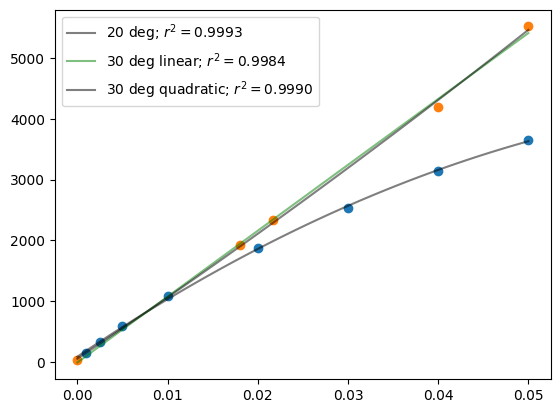

In [21]:
# KI Calibration - 30 deg

### Room Temp
x=np.array(ki_x)
y=np.array(ki_c_20)
plt.scatter(x,y)

xs = np.linspace(0,0.05,100)


## quadratic fit
popt_i, pcov = curve_fit( quad, x , y )

# r^2
residuals = y - quad(x, *popt_i)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
s3 = 1 - (ss_res / ss_tot)
plt.plot(xs,quad(xs,*popt_i), 'k-', alpha = 0.5, label=f'20 deg; $r^2 = {s3:.4f}$')

### 30 deg

x2=np.array(ki_x_30)
y2=np.array(ki_c_30)
plt.scatter(x2,y2)

# straight line fit
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(x2.reshape(-1,1),y2.reshape(-1,1))
m30_i = lin_reg.coef_[0][0]
c30_i = lin_reg.intercept_[0]
s30 = lin_reg.score(x2.reshape(-1,1),y2.reshape(-1,1))
plt.plot(xs,(m30_i*xs + c30_i),'g-',alpha=0.5, label=f'30 deg linear; $r^2 = {s30:.4f}$')

## quadratic fit
popt30_i, pcov2 = curve_fit( quad, x2 , y2 )

# r^2
residuals = y2 - quad(x2, *popt30_i)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y2-np.mean(y2))**2)
s30_q = 1 - (ss_res / ss_tot)
plt.plot(xs,quad(xs,*popt30_i), 'k-', alpha = 0.5, label=f'30 deg quadratic; $r^2 = {s30_q:.4f}$')


plt.legend()
plt.show()

## IR BnCl cal

In [22]:
mass = 0.1768
moles = mass / 126.58

In [23]:
mass2 = 0.0294
moles2 = mass2 / 126.58

In [24]:
mass3 = 0.0081
moles3 = mass3 / 126.58

In [25]:
mass4 = 0.0175
moles4 = mass4 / 126.58

In [26]:
concs3 = 1000 * moles3 / 10

In [27]:
vols = np.array((1/10,1/20,1/30,1/40,1/50,3/250))
concs = 1000 * moles * vols
concs2 = 1000 * moles2 * vols[:2]
concs4 = 1000 * moles4 * vols[:3]

In [28]:
abs = [0.046,0.0238,0.01674,0.01268,0.01034,0.0064]
abs2 = np.array((0.058,0.030,0.021,0.016,0.013,0.0081))
abs3 = np.array((0.0106,0.0053))
abs4 = np.array((0.0023))
abs5 = np.array((0.0059,0.0027,0.002))

In [29]:
abs2_679 = np.array((0.0085,0.0045,0.0030,0.0022,0.0019,0.0013))
abs3_679 = np.array((0.0017,0.0009))
abs4_679 = np.array((0.00037))
abs5_679 = np.array((0.00085,0.00046,0.00037))

In [30]:
concs_all = np.hstack((concs,concs2,concs3,concs4))
abs_all = np.hstack((abs2,abs3,abs4,abs5))
abs_all_679 = np.hstack((abs2_679,abs3_679,abs4_679,abs5_679))

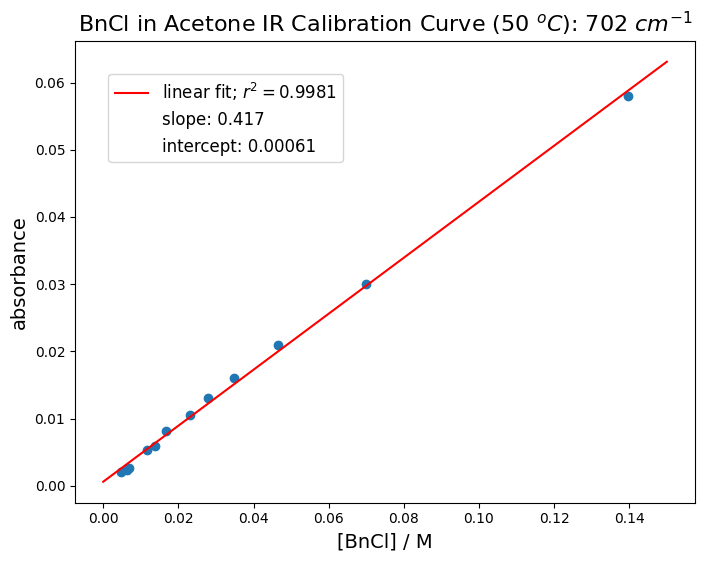

In [31]:
x = concs_all
y = abs_all

plt.figure(figsize=(8,6))

plt.scatter(x,y)

xs = np.linspace(0,0.15,20)

# straight line fit
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(x.reshape(-1,1),y.reshape(-1,1))
slope_702 = lin_reg.coef_[0][0]
int_702 = lin_reg.intercept_[0]
score_702 = lin_reg.score(x.reshape(-1,1),y.reshape(-1,1))

plt.plot(xs,(slope_702*xs + int_702),'r-', label=f'linear fit; $r^2 = {score_702:.4f}$')

plt.plot([],[],alpha=0,label=f'slope: {slope_702:.3f}')
plt.plot([],[],alpha=0,label=f'intercept: {int_702:.5f}')

plt.xlabel('[BnCl] / M',fontsize=14)
plt.ylabel('absorbance',fontsize=14)
plt.title('BnCl in Acetone IR Calibration Curve (50 $^oC)$: 702 $cm^{-1}$',fontsize=16)
plt.legend(borderaxespad=2,fontsize=12)

plt.show()

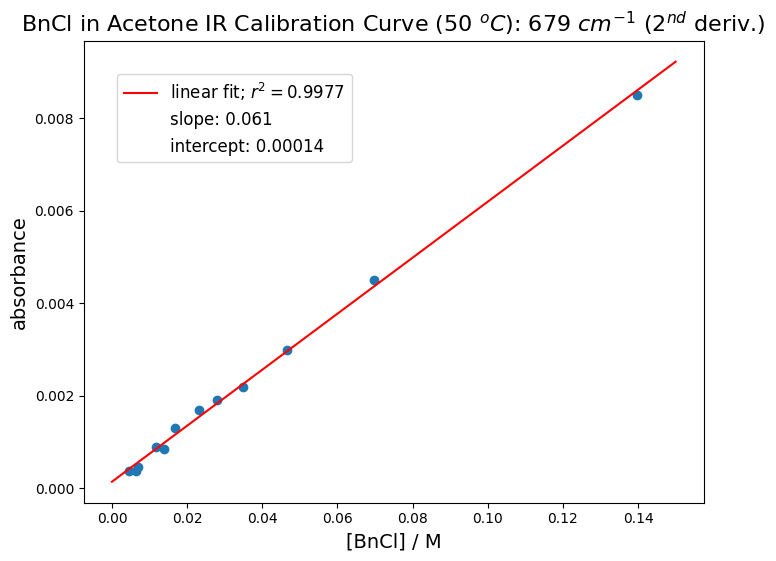

In [32]:
x = concs_all
y = abs_all_679

plt.figure(figsize=(8,6))

plt.scatter(x,y)

xs = np.linspace(0,0.15,20)

# straight line fit
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(x.reshape(-1,1),y.reshape(-1,1))
slope_679 = lin_reg.coef_[0][0]
int_679 = lin_reg.intercept_[0]
score_679 = lin_reg.score(x.reshape(-1,1),y.reshape(-1,1))

plt.plot(xs,(slope_679*xs + int_679),'r-', label=f'linear fit; $r^2 = {score_679:.4f}$')

plt.plot([],[],alpha=0,label=f'slope: {slope_679:.3f}')
plt.plot([],[],alpha=0,label=f'intercept: {int_679:.5f}')

plt.xlabel('[BnCl] / M',fontsize=14)
plt.ylabel('absorbance',fontsize=14)
plt.title('BnCl in Acetone IR Calibration Curve (50 $^oC)$: 679 $cm^{-1}$ ($2^{nd}$ deriv.)',fontsize=16)
plt.legend(borderaxespad=2,fontsize=12)

plt.show()

In [33]:
int_679

0.00014089897561314233

30 deg

In [34]:
mass_30 = 0.0806
moles_30 = mass_30 / 126.58

In [35]:
concs_30 = 1000 * moles_30 * vols[:5]
abs_30 = np.array([0.03,0.0155,0.0105,0.008,0.0065])

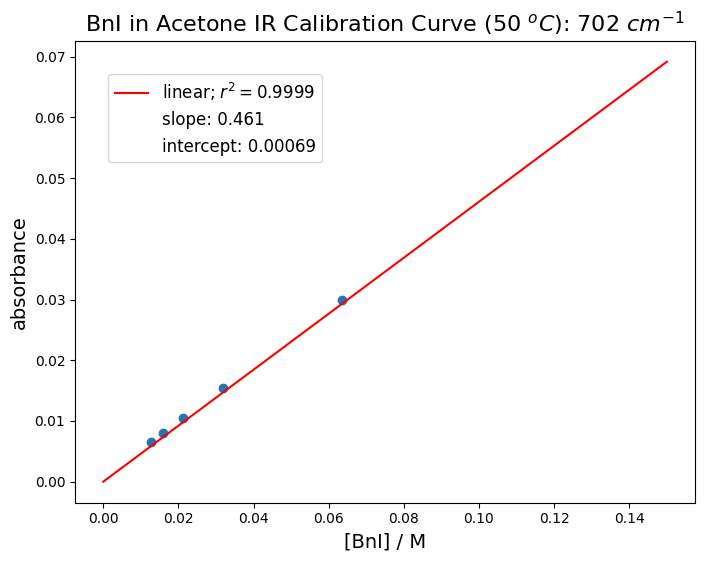

In [41]:
x = concs_30
y = abs_30

plt.figure(figsize=(8,6))

plt.scatter(x,y)

xs = np.linspace(0,0.15,20)

# straight line fit
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(x.reshape(-1,1),y.reshape(-1,1))
slope_30 = lin_reg.coef_[0][0]
int_30 = lin_reg.intercept_[0]
score_30 = lin_reg.score(x.reshape(-1,1),y.reshape(-1,1))
plt.plot(xs,(slope_30*xs),'r-', label=f'linear; $r^2 = {score_30:.4f}$')


## quadratic fit
popt_abs_30, pcov = curve_fit( quad, x , y )

# r^2
residuals = y - quad(x, *popt_abs_30)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
s = 1 - (ss_res / ss_tot)
#plt.plot(xs,quad(xs,*popt_abs_30), 'k-', alpha = 0.5, label=f'quadratic; $r^2 = {s:.4f}$')

plt.plot([],[],alpha=0,label=f'slope: {slope_30:.3f}')
plt.plot([],[],alpha=0,label=f'intercept: {int_30:.5f}')

plt.xlabel('[BnI] / M',fontsize=14)
plt.ylabel('absorbance',fontsize=14)
plt.title('BnI in Acetone IR Calibration Curve (50 $^oC)$: 702 $cm^{-1}$',fontsize=16)
plt.legend(borderaxespad=2,fontsize=12)
plt.show()

BnI cal


In [42]:
mass_bni = 0.0393
moles_bni = mass_bni / 218.035

In [43]:
concs_bni = 1000 * moles_bni * vols[:5]
abs_bni = np.array([0.0023,0.0014,0.00085,0.00062,0.00055])

In [44]:
concs_bni

array([0.01802463, 0.00901231, 0.00600821, 0.00450616, 0.00360493])

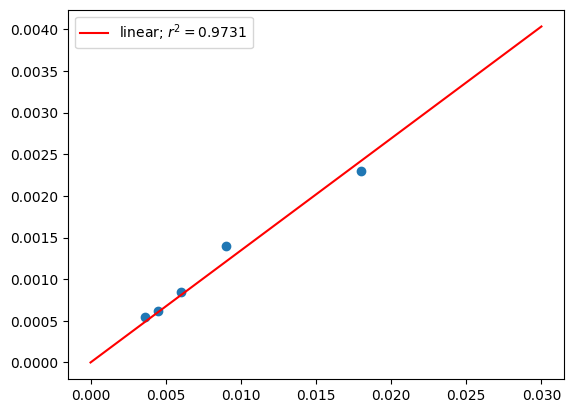

In [39]:
x = concs_bni
y = abs_bni

plt.scatter(x,y)

xs = np.linspace(0,0.03,20)

# straight line fit
lin_reg = LinearRegression(fit_intercept=False)
lin_reg.fit(x.reshape(-1,1),y.reshape(-1,1))
slope_bni = lin_reg.coef_[0][0]
#int_bni = lin_reg.intercept_[0]
score_bni = lin_reg.score(x.reshape(-1,1),y.reshape(-1,1))
plt.plot(xs,(slope_bni*xs),'r-', label=f'linear; $r^2 = {score_bni:.4f}$')

plt.legend()
plt.show()

In [40]:
slope_bni

0.13450312572891415